# 1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
pip install -U scikit-learn


The following command must be run outside of the IPython shell:

    $ pip install -U scikit-learn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [2]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score


In [3]:
data1 = pd.read_csv('delivery_time.csv')

In [4]:
data1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


(21, 2) Shape of Data Frame


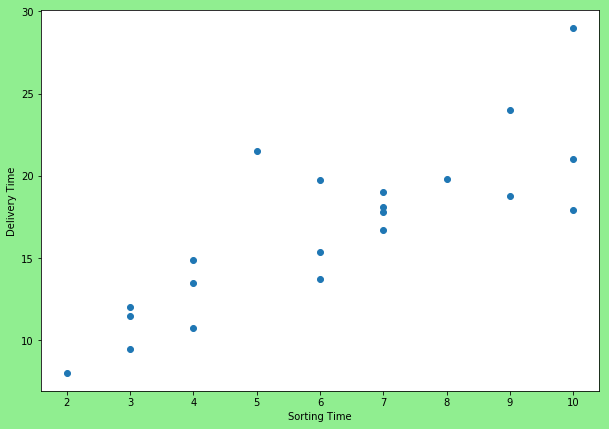

In [5]:
print (data1.shape,"Shape of Data Frame")
print ("="*30)
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data1['Sorting Time'],data1['Delivery Time']);
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")
plt.show()

In [6]:
data1[['Sorting Time']]

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [7]:
data1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [8]:
lm = LinearRegression()

X = data1['Sorting Time'].values.reshape(21,1)
Y = data1['Delivery Time'].values.reshape(21,1)

reg_sklearn = lm.fit(X,Y)

In [9]:
X

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [10]:
Y

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [11]:
print (reg_sklearn.coef_)
print (reg_sklearn.intercept_)

[[1.6490199]]
[6.58273397]


In [12]:
reg_sklearn.predict(X)

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

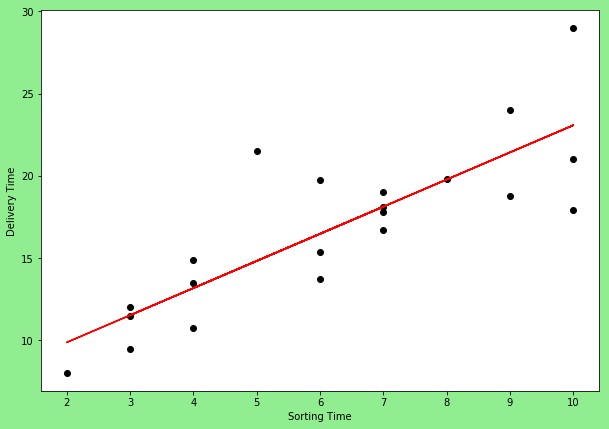

In [13]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data1['Sorting Time'],data1['Delivery Time'],color="black");
plt.plot(data1['Sorting Time'],data1['Sorting Time']*reg_sklearn.coef_[0]+reg_sklearn.intercept_,color="red");
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")
plt.show()

In [14]:
pred_train_lm =reg_sklearn.predict(X)
r2_score(data1['Delivery Time'],pred_train_lm)

0.6822714748417231

In [15]:
data1=data1.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)

In [16]:
data1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [36]:
first_model = smf.ols("Delivery_Time~Sorting_Time",data=data1).fit()

In [37]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           3.98e-06
Time:                        00:11:13   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
first_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [39]:
model2 = smf.ols("Delivery_Time~np.log(Sorting_Time)",data=data1).fit()

In [40]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           2.64e-06
Time:                        00:11:16   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model3 = smf.ols("np.log(Delivery_Time)~Sorting_Time",data=data1).fit()

In [42]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 31 Aug 2021   Prob (F-statistic):           1.59e-06
Time:                           00:11:43   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
    data1['Sorting_Time_sq'] = data1.Sorting_Time**2

In [44]:
data1.head()

,Delivery_Time,Sorting_Time,Sorting_Time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [45]:
final_model1 = smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Time_sq",data=data1).fit()

In [46]:
final_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Tue, 31 Aug 2021   Prob (F-statistic):           2.20e-06
Time:                           00:19:11   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
rsq = {'models':['model1','model2','model3','final_model'],'r square values':[first_model.rsquared,model2.rsquared,model3.rsquared,final_model1.rsquared]}

In [48]:
pd.DataFrame(rsq)

,models,r square values
0,model1,0.682271
1,model2,0.695443
2,model3,0.710948
3,final_model,0.764867


# 2) Salary_hike -> Build a prediction model for Salary_hike

In [20]:
data2=pd.read_csv('Salary_Data.csv')

In [21]:
data2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


(30, 2) Shape of Data Frame


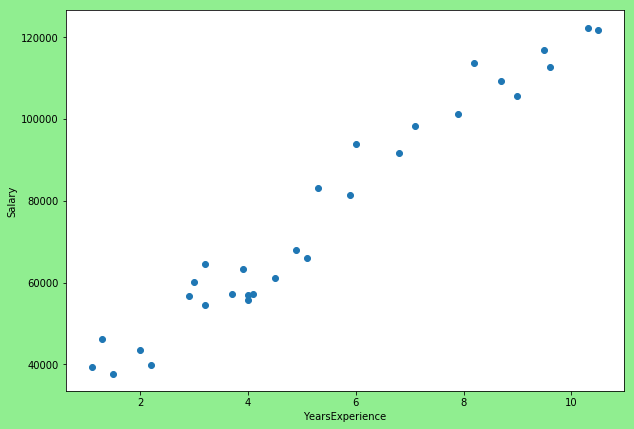

In [22]:
print (data2.shape,"Shape of Data Frame")
print ("="*30)
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data2['YearsExperience'],data2['Salary']);
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
plt.show()

In [23]:
data2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [24]:
lm1 = LinearRegression()

X = data2['YearsExperience'].values.reshape(30,1)
Y = data2['Salary'].values.reshape(30,1)

reg_sklearn1 = lm1.fit(X,Y)

In [25]:
print(reg_sklearn1.coef_)
print(reg_sklearn1.intercept_)

[[9449.96232146]]
[25792.20019867]


In [26]:
reg_sklearn1.predict(X)

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [27]:
Y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

(30, 2) Shape of Data Frame


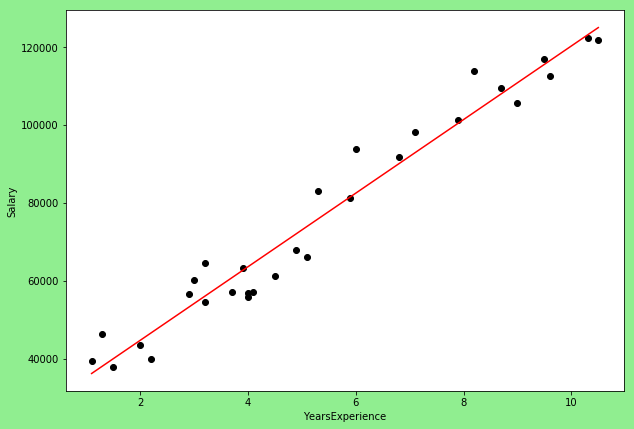

In [28]:
print (data2.shape,"Shape of Data Frame")
print ("="*30)
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data2['YearsExperience'],data2['Salary'],color="black");
plt.plot(data2['YearsExperience'],data2['YearsExperience']*reg_sklearn1.coef_[0]+reg_sklearn1.intercept_[0],color="red")
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
plt.show()

In [29]:
r2_score(data2['Salary'],reg_sklearn1.predict(X))

0.9569566641435086

In [30]:
model_new=smf.ols("Salary~YearsExperience",data=data2).fit()

In [31]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           1.14e-20
Time:                        00:06:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model_new.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [49]:
model4=smf.ols("Salary~np.log(YearsExperience)",data=data2).fit()

In [50]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           3.25e-13
Time:                        00:26:15   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model5=smf.ols("np.log(Salary)~YearsExperience",data=data2).fit()

In [52]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           7.03e-18
Time:                        00:27:03   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
data2['YearsExperience_sq']= data2.YearsExperience**2

In [54]:
data2.head()

,YearsExperience,Salary,YearsExperience_sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84


In [60]:
final_model2=smf.ols("np.log(Salary)~YearsExperience+YearsExperience_sq",data=data2).fit()

In [61]:
final_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           3.95e-18
Time:                        00:33:02   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
rsq1 = {'models':['model1','model2','model3','final_model'],'r square values':[model_new.rsquared,model4.rsquared,model5.rsquared,final_model2.rsquared]}

In [63]:
pd.DataFrame(rsq1)

,models,r square values
0,model1,0.956957
1,model2,0.853889
2,model3,0.931967
3,final_model,0.948611
